#**ML Assignment 2 – Data Pre-Processing**
**Data Pre-Processing of Diabetes Dataset**
The objective is to perform a thorough pre-processing of the diabetes dataset. The goal is to understand the dataset's structure, clean and prepare the data for further analysis, and address any issues related to outliers and missing values.

***Dataset Link:***
https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv





In [266]:
# Loading a Diabetes Dataset using Pandas DataFrame:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv')
df.head() # Dispaly first 5 rows

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [267]:
df.tail() # Dispaly last 5 rows

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N
1008,62,46059,M,55.0,7.0,56.0,9.1,3.7,1.9,0.7,2.3,0.9,27.0,Y


In [268]:
df.shape # Display the number of rows and columns

(1009, 14)

In [269]:
df.columns.to_list() # Display the column names

['ID',
 'No_Pation',
 'Gender',
 'AGE',
 'Urea',
 'Cr',
 'HbA1c',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI',
 'CLASS']

In [270]:
df.info() # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


**Pre-Processing Steps:-**

**1. Data Cleaning:**

***1.1 Rename Columns:*** Update column names such as **'No_Pation'** to **'Patients'** to make them more descriptive and clear.

In [271]:
# Rename Columns from "No_Pation" to "Patients":

#df = df.rename(columns={'No_Pation': 'Patients'})
df.rename(columns={'No_Pation': 'Patients'}, inplace=True)
df.columns.to_list()

['ID',
 'Patients',
 'Gender',
 'AGE',
 'Urea',
 'Cr',
 'HbA1c',
 'Chol',
 'TG',
 'HDL',
 'LDL',
 'VLDL',
 'BMI',
 'CLASS']

In [272]:
df.head() # Dispaly first 5 rows

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


***1.2 Check Unique Values in Categorical Columns:***

Identify the unique values in categorical columns:

**Gender:** F (Female) & M (Male),

**CLASS:**  N (No diabetes), P (Pre-diabetes), Y (Yes, Diabetes).

Review and correct any unexpected or incorrect values if necessary.


In [273]:
# Check unique values in 'Gender' column
print(df['Gender'].unique())

print(f'The Number of Unique Values in Gender Column is: {df["Gender"].nunique()}')

# Check unique values in 'CLASS' column
print('\n',df['CLASS'].unique())

print(f'The Number of Unique Values in CLASS Column is: {df["CLASS"].nunique()}')

['F' 'M' nan 'f']
The Number of Unique Values in Gender Column is: 3

 ['N' 'N ' 'P' 'Y' 'Y ']
The Number of Unique Values in CLASS Column is: 5


In [274]:
# During data pre-processing, it's crucial to review and correct any inconsistencies or errors in categorical columns.
# This involves identifying and handling:
#   - Typos or variations in how categories are represented (e.g., "F" and "f" for Female).
#   - Unexpected or invalid values that don't belong to the defined set of categories.
#   - Missing values (NaN) that may require imputation or removal depending on the context.

# In the provided example, the 'Gender' column has 'f' which is a variation of 'F'.
# The 'CLASS' column has 'N ' and 'Y ' with extra spaces.
# These issues need to be addressed to ensure data consistency and accuracy for further analysis.

# Code to correct the issues:

# Replace 'f' with 'F' in the 'Gender' column
df['Gender'] = df['Gender'].replace('f', 'F')

# Remove extra spaces in the 'CLASS' column
df['CLASS'] = df['CLASS'].str.strip()


# Check unique values again to verify the correction
print(df['Gender'].unique())
print(f'The Number of Unique Values in Gender Column is: {df["Gender"].nunique()}')
print('\n',df['CLASS'].unique())
print(f'The Number of Unique Values in CLASS Column is: {df["CLASS"].nunique()}')

['F' 'M' nan]
The Number of Unique Values in Gender Column is: 2

 ['N' 'P' 'Y']
The Number of Unique Values in CLASS Column is: 3


In [275]:
df.isnull().sum() # Check for missing values (nan) in each column [MISSING VALUES COUNT]

,0
ID,0
Patients,0
Gender,3
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


***1.3 Statistical Summary of Numerical Columns:*** Generate a statistical summary (mean, median, min, max, standard deviation) for all numerical columns to gain insights into the data's distribution.

In [276]:
# Calculate the statistical summary for numerical columns
numerical_summary = df.describe()

# Display the summary
numerical_summary


,ID,Patients,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,338.166501,2.717468e+05,53.596230,5.132979,68.938431,8.281372,4.862483,2.346783,1.202728,2.611708,1.850496,29.573062
std,239.479644,3.365681e+06,8.743882,2.930873,59.815673,2.534861,1.298665,1.396438,0.658038,1.115990,3.649872,4.953338
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,126.000000,2.406400e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,294.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,547.000000,4.539100e+04,59.000000,5.700000,73.000000,10.175000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


***1.4 Box Plot of Numerical Columns:*** Create a box plot for all numerical columns in a single graph to visualize their distribution, range, and outliers. Explain any visible trends or outliers.

<Axes: >

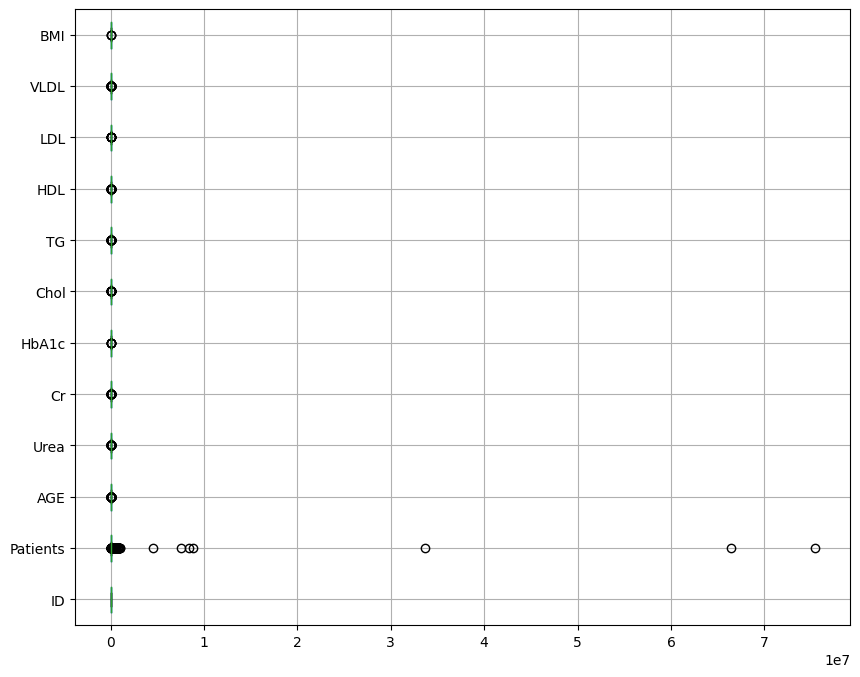

In [277]:
df.boxplot(['ID', 'Patients',	'AGE',	'Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL',	'BMI'], vert=False, figsize=(10, 8))


##**Explanation of potential trends and outliers:**
**Based on the box plot, we can observe the following:**

**1. BMI, VLDL, LDL, HDL, TG, Chol, HbA1c, Cr, Urea:**

These variables show a tight distribution. The boxes for these variables are extremely narrow, suggesting that their values are clustered around the median with very little spread.
There are no significant outliers, meaning most patients have consistent values across these metrics. The absence of spread indicates that the patient population is relatively homogeneous in terms of these health parameters.

**2. AGE:**

Age has a bit more spread than the other variables. While there are no extreme outliers, the boxplot shows a broader range, indicating variation in the ages of the patients.
Most of the patients' ages seem to be concentrated around the lower range, but the overall age distribution suggests that the dataset includes patients from different age groups.

**3. Patients:**

There are several outliers in the Patients column, indicating that a few patients have significantly higher or lower values compared to the majority.
This could indicate that certain patients have more or fewer associated records, visits, or other indicators of health interactions.
The presence of outliers suggests a need to further investigate whether these extreme values are valid or indicative of anomalies in data collection or patient characteristics.

**4. ID:**

As mentioned earlier, ID is not a variable typically associated with outliers, as it is often a unique identifier. The fact that there are no visible outliers for ID aligns with the expectation that IDs should not exhibit significant variation in terms of their statistical properties.
Any apparent variation here is likely a result of the range of ID numbers rather than meaningful outliers.

***Overall Insights:***

- Most health-related metrics show very tight distributions with minimal outliers, suggesting a fairly uniform patient population in terms of these metrics.

- Patients stands out with multiple outliers, potentially pointing to specific patients with unusual data points or cases.

- The age distribution is a bit broader but still does not show extreme variation, implying a somewhat diverse age group but without extreme differences.


***1.5 Identify Missing (Null) Values:*** Determine the number of missing values in each column and report which columns have null values.

In [278]:
def missing_values():
    # Check for missing values (NaN) in each column and count them
    missing_values_count = df.isnull().sum()

    # Columns with missing values
    columns_with_missing_values = missing_values_count[missing_values_count > 0]

    # Columns without missing values
    columns_without_missing_values = missing_values_count[missing_values_count == 0]

    # Reporting totals
    total_columns = len(missing_values_count)
    total_missing_columns = len(columns_with_missing_values)
    total_non_missing_columns = len(columns_without_missing_values)

    print(f"Total columns: {total_columns}")
    print(f"Columns with missing values: {total_missing_columns}")
    print(f"Columns without missing values: {total_non_missing_columns}")

    if total_missing_columns > 0:
        print("\nColumns with missing values and their counts:")
        print(columns_with_missing_values)
    else:
        print("\nNo missing values in any column.")

# Call the function to check missing values
missing_values()

Total columns: 14
Columns with missing values: 10
Columns without missing values: 4

Columns with missing values and their counts:
Gender    3
AGE       1
Urea      1
Cr        2
HbA1c     3
Chol      2
TG        2
HDL       1
LDL       2
VLDL      1
dtype: int64


***1.6 Impute Missing Values:*** Select an appropriate strategy (mean, median, or mode) to impute missing values in the dataset. Justify the imputation technique for each column. After imputation, verify that no missing values remain.


In [279]:
# Fill missing values (nan) in "Gender" columns with "Unknown"
'''
The 'Gender' column is categorical column also cursial so I am not using "MODE" to impute this column .
Better I imputing this column with "Unknown" value is appropriate.
'''
# df['Gender'].fillna('Unknown', inplace=True)
df['Gender'] = df['Gender'].fillna('Unknown')
df['Gender'].unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [280]:
missing_values()

Total columns: 14
Columns with missing values: 9
Columns without missing values: 5

Columns with missing values and their counts:
AGE      1
Urea     1
Cr       2
HbA1c    3
Chol     2
TG       2
HDL      1
LDL      2
VLDL     1
dtype: int64


#**NUMERICAL COLUMNS IMPUTATION - MEDIAN STRATEGY**
##**Benefits of Using Median:**

**Robust to Outliers:** The median is less sensitive to extreme values compared to the mean. In healthcare datasets, it is common to have outliers (e.g., patients with extreme cholesterol levels or age). The median prevents those outliers from influencing the imputation, resulting in a more stable central tendency.

**Works for Skewed Distributions:** Many health metrics, such as cholesterol and triglycerides, often exhibit skewed distributions. The median is more representative of the central tendency in such cases, as it captures the middle value without being pulled towards the extremes.

##**Explanation for Each Column:**

- **AGE:** There can be extremes (very young or very old patients), so the median is appropriate to avoid skew from outliers.

- **Urea and Cr:** These kidney function markers can vary widely due to health conditions, and using the median will reduce the impact of high or low extremes.

- **HbA1c:** Even though HbA1c is often normally distributed, the median can still be effective because it avoids any influence from a few extreme cases.

- **Chol, TG, HDL, LDL, VLDL**: These lipid profile measures can have a wide range of values. Using the median will prevent high-risk cases from skewing the imputation value, providing a more reliable central estimate.

In [281]:
# List of columns where you want to use median imputation
columns_to_impute = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']

# Imputing missing values using the median for all specified columns
for column in columns_to_impute:
    df[column] = df[column].fillna(df[column].median())

# Verifying that no missing values remain
missing_values()

Total columns: 14
Columns with missing values: 0
Columns without missing values: 14

No missing values in any column.


***1.7 Outlier Handling:*** Outliers in medical data may represent critical conditions and, depending on the context, should be retained or removed with care.

**a. Retain Outliers:** Retain outliers in the AGE, HbA1c, and BMI columns, explaining why they should be preserved.



**Retaining outliers in AGE, HbA1c, and BMI columns.**

**Explanation:**

Outliers in these columns might represent important clinical information. For example:
- **AGE:** Very high or low age values can be important for understanding disease prevalence in different age groups.
- **HbA1c:** Extremely high HbA1c values can be crucial in detecting diabetes and its severity.
- **BMI:** Very high or low BMI can be associated with conditions like obesity or malnutrition, which might be relevant for the study.

In this case, we choose to retain the outliers because they might be clinically meaningful.

We are not removing them as they might be important for analysis related to specific medical conditions.

**Note:**

- The decision of whether to retain or remove outliers depends heavily on the research question and the specific context of the data.

- If the goal is to build a model for predicting a certain outcome, and outliers are causing significant bias or overfitting, it might be necessary to address them.

- However, in other cases, outliers could be valuable insights and should be retained.


No code needed to retain outliers, as we're not removing them in this step.

**b. Filter Outliers:** In the Creatinine Ratio (Cr) column, exclude values that exceed the 99.5th percentile threshold. Similarly, in the Urea column, exclude values that exceed the 99.9th percentile threshold. Use these specific percentile thresholds for filtering, and do not apply IQR or other methods.

In [285]:
# Calculate the 99.5th percentile for the 'Cr' column
cr_threshold = df['Cr'].quantile(0.995)

# Filter out values exceeding the threshold in the 'Cr' column
df = df[df['Cr'] <= cr_threshold]

# Calculate the 99.9th percentile for the 'Urea' column
urea_threshold = df['Urea'].quantile(0.999)

# Filter out values exceeding the threshold in the 'Urea' column
df = df[df['Urea'] <= urea_threshold]

**c. Remove Extreme Outliers:** For lipid-related columns (LDL, VLDL, HDL, TG, Chol), remove extreme outliers using an appropriate method such as IQR or  Z-score.


In [286]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

# Lipid-related columns
lipid_columns = ['LDL', 'VLDL', 'HDL', 'TG', 'Chol']

# Remove outliers for each lipid column
for column in lipid_columns:
  df = remove_outliers_iqr(df, column)

# Print the shape of the dataframe after removing outliers
print(df.shape)

(809, 14)


<Axes: >

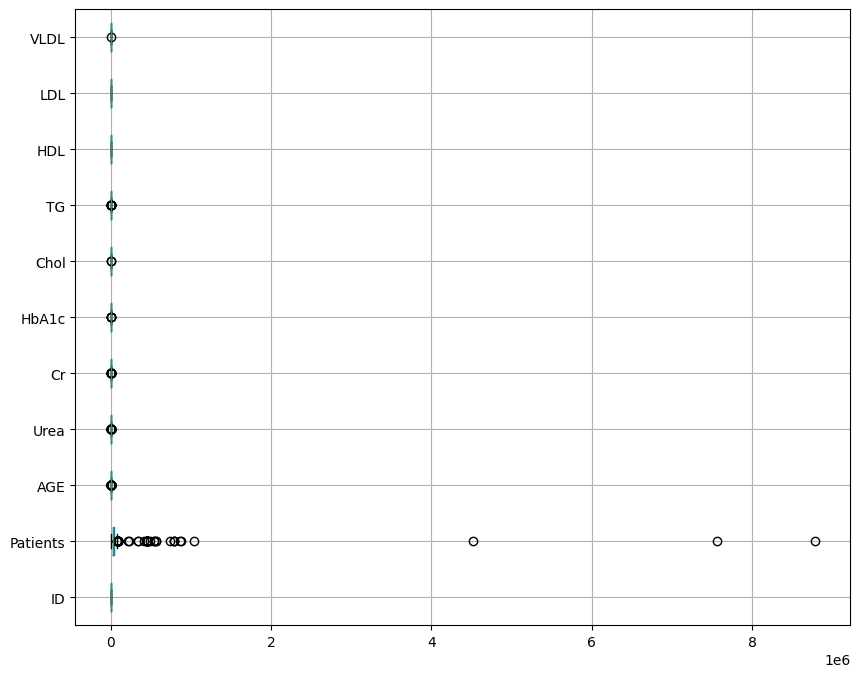

In [287]:
df.boxplot(['ID', 'Patients',	'AGE',	'Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL'], vert=False, figsize=(10, 8))

***1.8 Check for Duplicates:*** Identify any duplicate rows and remove them to avoid redundant data in analysis.


In [288]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicate rows (keep the first occurrence)
df = df.drop_duplicates()

# Print the new shape of the dataframe
print(f"Shape of the dataframe after removing duplicates: {df.shape}")


Number of duplicate rows: 7
Shape of the dataframe after removing duplicates: (802, 14)


**#2. Data Transformation:**

***2.1 Feature Engineering:*** Apply Label Encoding or One-Hot Encoding to the categorical column Gender to convert it into numeric format for model-building purposes.


In [290]:
# Use Label Encoding for 'Gender' column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Alternatively, you can use One-Hot Encoding
# pd.get_dummies(df, columns=['Gender'], prefix=['Gender'])


***2.2 Feature Scaling:*** Standardize or normalize the numerical columns that have varying scales (e.g., Patients, AGE, BMI, Cr) to ensure consistent contribution in subsequent analyses. Justify the scaling method used (standardization vs. normalization).


In [291]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to be scaled
numerical_cols_to_scale = ['Patients', 'AGE', 'BMI', 'Cr']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

#**Justification for using Standardization:**

***Standardization (Z-score normalization) is preferred in this case because:***

1. It assumes a normal distribution of the data. While not strictly necessary, it's often a reasonable assumption for many health metrics.

2. It transforms data to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on a similar scale and prevents features with larger values from dominating the analysis.

3. Standardization is widely used in machine learning algorithms, especially those based on Euclidean distance, to prevent features with larger magnitudes from having a disproportionate impact.


In [302]:
df.head()

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,-0.109,1,-3.249,4.5,-0.010,4.9,3.7,1.4,1.1,2.1,0.6,-1.305,N
4,504,-0.109,1,-2.428,7.1,-0.665,4.9,4.9,1.0,0.8,2.0,0.4,-1.729,N
5,634,-0.109,0,-1.020,2.3,-1.567,4.0,2.9,1.0,1.0,1.5,0.4,-1.729,N
6,721,-0.109,0,-0.434,2.0,-0.501,4.0,3.6,1.3,0.9,2.1,0.6,-1.094,N
7,421,-0.109,1,-0.668,4.7,-0.624,4.0,2.9,0.8,0.9,1.6,0.4,-1.094,N


In [303]:
df[numerical_cols_to_scale] = df[numerical_cols_to_scale].round(3)
df[numerical_cols_to_scale]

,Patients,AGE,BMI,Cr
1,-0.109,-3.249,-1.305,-0.010
4,-0.109,-2.428,-1.729,-0.665
5,-0.109,-1.020,-1.729,-1.567
6,-0.109,-0.434,-1.094,-0.501
7,-0.109,-0.668,-1.094,-0.624
...,...,...,...,...
996,-0.131,0.036,0.811,0.195
997,0.826,1.209,0.599,1.794
1001,0.826,0.153,0.197,-0.010
1002,0.826,0.153,0.176,1.056


In [304]:
df.head()

,ID,Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,-0.109,1,-3.249,4.5,-0.010,4.9,3.7,1.4,1.1,2.1,0.6,-1.305,N
4,504,-0.109,1,-2.428,7.1,-0.665,4.9,4.9,1.0,0.8,2.0,0.4,-1.729,N
5,634,-0.109,0,-1.020,2.3,-1.567,4.0,2.9,1.0,1.0,1.5,0.4,-1.729,N
6,721,-0.109,0,-0.434,2.0,-0.501,4.0,3.6,1.3,0.9,2.1,0.6,-1.094,N
7,421,-0.109,1,-0.668,4.7,-0.624,4.0,2.9,0.8,0.9,1.6,0.4,-1.094,N


In [305]:
df.to_csv('diabetes_preprocessed.csv', index=False)